<a href="https://colab.research.google.com/github/pembatt/Depression_Screening_Tool/blob/main/Screening_tool_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install and import all the necessary packages

#!pip install nltk # Already available in Colab
#!pip install spacy # Already available in Colab
!pip install vaderSentiment
# !pip install openpyxl # Already available in Colab
# !pip install TensorFlow # Already available in Colab
# !pip install NumPy # Already available in Colab



import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from spacy import displacy

#mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')


# Load the dataset
#dataset = pd.read_excel(r"/content/drive/MyDrive/Project_datasets/dataset_1.xlsx")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **The following are only for the processed datasets. **

In [3]:
# dataset = pd.read_csv(r"/content/drive/MyDrive/Project_datasets/screening_tool_save.csv")

# If dataset has been uploaded to VM
dataset = pd.read_csv(r"/content/drive/MyDrive/Project_datasets/screening_tool_save.csv")


In [4]:
type(dataset), dataset.shape

(pandas.core.frame.DataFrame, (6970, 11))

In [8]:
dataset.dropna(inplace=True) # There are no missing: This step is non necessary

In [5]:
dataset.columns

Index(['text', 'label', 'sentiment_analysis', 'anger', 'disgust', 'fear',
       'joy', 'neutral', 'sadness', 'surprise', 'text_classification'],
      dtype='object')

In [6]:
import ast # Convert a string into its literal Python data equivalent

# Here's a demo using the first entry from dataset
sent_dict = ast.literal_eval(dataset.sentiment_analysis[0])

# sent_dict is now a dict
sent_dict[0], type(sent_dict[0])

({'label': 'POSITIVE', 'score': 0.9942747950553894}, dict)

In [7]:
# As such you can just query its entries with a key
sent_dict[0]['label'], sent_dict[0]['score']

('POSITIVE', 0.9942747950553894)

In [8]:
# Code the sentiment values onto the dataset as separate columns

dataset['sentiment_label'] = [ast.literal_eval(sent_dict)[0]['label'] for sent_dict in dataset.sentiment_analysis]

dataset['sentiment_socre'] = [ast.literal_eval(sent_dict)[0]['score'] for sent_dict in dataset.sentiment_analysis]

dataset.shape

(6970, 13)

In [9]:
# Code the depression values onto dataset as separate columns

# Code the sentiment values onto the dataset as separate columns

dataset['depression_model_label'] = [ast.literal_eval(sent_dict)[0]['label'] for sent_dict in dataset.sentiment_analysis]

dataset['depression_score'] = [ast.literal_eval(sent_dict)[0]['score'] for sent_dict in dataset.sentiment_analysis]

dataset.shape

(6970, 15)

In [10]:
# Since the old column was separated and added to the df, drop the redundant column
dataset = dataset.drop('sentiment_analysis', axis=1)
dataset = dataset.drop('text_classification', axis=1)

In [11]:
dataset[:1]

,text,label,anger,disgust,fear,joy,neutral,sadness,surprise,sentiment_label,sentiment_socre,depression_model_label,depression_score
0,oh my gosh,1,0.003898,0.005252,0.006823,0.004054,0.00487,0.02222,0.952884,POSITIVE,0.994275,POSITIVE,0.994275


# This section is for using models from hugging dace to add sentiment and analysis to text. Ignore if using processed data.

In [ ]:
#install dependencies
!pip install -q transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

In [14]:
#trying the model out

data = ["i love you", "i hate you"]
sent_list = sentiment_pipeline(data)

sent_list[0], type(sent_list[0])

NameError: ignored

In [ ]:
# trying sentiment analysis on our whole dataset and appending it
# Note: this takes 8 minutes to process the whole dataset

dataset['new_sentiment'] = dataset['text'].apply(sentiment_pipeline)

dataset.shape

(6970, 14)

In [ ]:
dataset.columns

Index(['text', 'label', 'sentiment_analysis', 'anger', 'disgust', 'fear',
       'joy', 'neutral', 'sadness', 'surprise', 'text_classification',
       'text_label', 'nuscore', 'new_sentiment'],
      dtype='object')

In [21]:
# Do these new sentiment values natch the old ones?
from sklearn.metrics import confusion_matrix

# We do not need ast.literal_eval here, because the pipeline output is real dicts
new_sent_label = [sent_dict[0]['label'] for sent_dict in dataset.new_sentiment]

confusion_matrix(dataset.text_label, new_sent_label)

AttributeError: ignored

The pipeline results perfectly match what was already in the dataset. Not sure why we need the pipeline.

In [ ]:
# There was already a label field on the dataset before
# Let's see if that is also the same thing:

confusion_matrix(dataset.text_label, [str(lab) for lab in dataset.label])

array([[   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [4021,  585,    0,    0],
       [2219,  145,    0,    0]])

So that label field on the original dataset (besides being numeric) is something else entirely.

In [12]:
dataset.tail(4)

,text,label,anger,disgust,fear,joy,neutral,sadness,surprise,sentiment_label,sentiment_socre,depression_model_label,depression_score
6966,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0,0.136721,0.009054,0.033836,0.542259,0.166366,0.032482,0.079283,NEGATIVE,0.715462,NEGATIVE,0.715462
6967,Dai5y! <3,0,0.050034,0.013654,0.004290,0.244015,0.258058,0.055311,0.374638,NEGATIVE,0.512599,NEGATIVE,0.512599
6968,tired of clowns but still hopefully tonight if...,0,0.004105,0.003809,0.006345,0.067671,0.329036,0.515005,0.074030,NEGATIVE,0.985696,NEGATIVE,0.985696
6969,MW SUBI WN LA VACA,0,0.011582,0.003608,0.004455,0.004445,0.802054,0.047286,0.126570,NEGATIVE,0.967790,NEGATIVE,0.967790


In [ ]:
# This will not actually make a copy: It just creates
# another view into the same data.

# See this page if you really want to make a new copy:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
dataset_copy = dataset


In [23]:
# save the final dataset
dataset.to_csv('Processed_dataset_1.csv', index=False)

Jeff stopped here because not sure what you are trying to do next. Try to use the examples above to continue.

In [ ]:
#emotion analysis
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True, truncation=True, max_length=512)
emotion_pipeline(test_strings)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'anger', 'score': 0.003897731425240636},
  {'label': 'disgust', 'score': 0.005251820664852858},
  {'label': 'fear', 'score': 0.0068231793120503426},
  {'label': 'joy', 'score': 0.004054191987961531},
  {'label': 'neutral', 'score': 0.004869537428021431},
  {'label': 'sadness', 'score': 0.022219721227884293},
  {'label': 'surprise', 'score': 0.9528838396072388}],
 [{'label': 'anger', 'score': 0.0029011527076363564},
  {'label': 'disgust', 'score': 0.0003176231402903795},
  {'label': 'fear', 'score': 0.9832799434661865},
  {'label': 'joy', 'score': 0.0007784996414557099},
  {'label': 'neutral', 'score': 0.0026072205509990454},
  {'label': 'sadness', 'score': 0.00838346779346466},
  {'label': 'surprise', 'score': 0.0017321493942290545}],
 [{'label': 'anger', 'score': 0.005230482667684555},
  {'label': 'disgust', 'score': 0.0020901469979435205},
  {'label': 'fear', 'score': 0.9614273309707642},
  {'label': 'joy', 'score': 0.002191537758335471},
  {'label': 'neutral', 'score': 0

In [ ]:
#trying emotion analysis on our whole dataset and appending it


dataset['emotion_analysis'] = dataset['text'].apply(emotion_pipeline)


In [ ]:
# First, ensure that all entries in the 'emotion_analysis' column are indeed dictionaries
dataset['emotion_analysis'] = dataset['emotion_analysis'].apply(lambda x: {d['label']:d['score'] for d in x[0]})

emotions_df = dataset['emotion_analysis'].apply(pd.Series)

# Rename the columns with the corresponding emoji
emotions_df.columns = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Join the new DataFrame with the original one
dataset = pd.concat([dataset, emotions_df], axis=1)

# Drop the original 'emotion_analysis' column
dataset = dataset.drop(columns=['emotion_analysis'])

In [ ]:
# how to score it?
# for emotion

dataset['emotion_analysis'] = dataset['emotion_analysis'].apply(lambda x: {d['label']:d['score'] for d in x[0]})

emotions_df = dataset['emotion_analysis'].apply(pd.Series)

emotions_df.columns = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']



# Join the new DataFrame with the original one

dataset = pd.concat([dataset, emotions_df], axis=1)



# Drop the original 'emotion_analysis' column

dataset = df.drop(columns=['emotion_analysis'])



KeyError: ignored

In [ ]:
#Trying a transformer model to detect depression, checking the labels and the machine's accuracy


from transformers import pipeline
depression_classifier = pipeline("text-classification", model="paulagarciaserrano/roberta-depression-detection")


In [ ]:

depression_classifier('Iam happy  at the same time')


[{'label': 'not depression', 'score': 0.9972456693649292}]

In [ ]:
dataset['text_classification'] = dataset['text'].apply(depression_classifier)


In [ ]:
#Trial don' tknow how exactly to use it
# Create a NER analysis pipeline
#ner_pipeline = pipeline("ner")
#dataset['ner'] = dataset['text'].apply(ner_pipeline)


In [ ]:
dataset.to_csv("screening_tool_save.csv", index=False)

# Analyzing the dataset for patterns

In [38]:
# Pick max emotion for analysis

df = dataset
# Create a list of the emotion column names
emotion_columns = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Iterate over the rows
for index, row in df.iterrows():
    # Find the column name with the highest score
    max_emotion = max(emotion_columns, key=lambda x: row[x])

    # Assign the max_emotion value to the emotion column
    df.at[index, 'emotion'] = max_emotion




In [40]:
df[:1]

,text,label,anger,disgust,fear,joy,neutral,sadness,surprise,sentiment_label,sentiment_socre,depression_model_label,depression_score,emotion
0,oh my gosh,1,0.003898,0.005252,0.006823,0.004054,0.00487,0.02222,0.952884,POSITIVE,0.994275,POSITIVE,0.994275,surprise


In [41]:
# Split the dataset into two based on label
df_zero = df[dataset["label"] == 0]
df_one = df[dataset["label"] == 1]

# Print the two datasets
df_zero.describe()


,label,anger,disgust,fear,joy,neutral,sadness,surprise,sentiment_socre,depression_score
count,6240.0,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000
mean,0.0,0.071149,0.056234,0.067336,0.106850,0.400871,0.139021,0.158540,0.957281,0.957281
std,0.0,0.155068,0.131240,0.175169,0.218149,0.319048,0.239601,0.228853,0.091427,0.091427
min,0.0,0.000605,0.000233,0.000194,0.000317,0.000630,0.000872,0.000429,0.500019,0.500019
25%,0.0,0.007723,0.003793,0.003552,0.004805,0.083644,0.012970,0.015573,0.970695,0.970695
50%,0.0,0.016680,0.010902,0.008903,0.014262,0.354187,0.034371,0.056218,0.993261,0.993261
75%,0.0,0.049906,0.039157,0.031071,0.068209,0.710983,0.116703,0.189828,0.998581,0.998581
max,0.0,0.991977,0.991473,0.993852,0.992344,0.975129,0.990571,0.983797,0.999888,0.999888


In [31]:
df_one.describe()

,label,anger,disgust,fear,joy,neutral,sadness,surprise,sentiment_socre,depression_score
count,730.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1.0,0.032431,0.012195,0.741608,0.012568,0.077542,0.095078,0.028580,0.970967,0.970967
std,0.0,0.114526,0.039851,0.342736,0.061965,0.150903,0.211291,0.088627,0.074778,0.074778
min,1.0,0.000588,0.000131,0.000487,0.000485,0.000419,0.000914,0.000309,0.514284,0.514284
25%,1.0,0.002407,0.001046,0.609325,0.001125,0.004931,0.003604,0.002500,0.986093,0.986093
50%,1.0,0.005323,0.002451,0.930755,0.001981,0.018324,0.010043,0.005299,0.995589,0.995589
75%,1.0,0.014336,0.007427,0.979461,0.004332,0.068201,0.038177,0.015733,0.998533,0.998533
max,1.0,0.992181,0.724340,0.995639,0.956967,0.860411,0.989963,0.952884,0.999886,0.999886


TEXT PROCESSING

In [27]:
import numpy as np
dataset.head

<bound method NDFrame.head of                                                    text  label     anger  \
0                                            oh my gosh      1  0.003898   
1     trouble sleeping, confused mind, restless hear...      1  0.002901   
2     All wrong, back off dear, forward doubt. Stay ...      1  0.005230   
3     I've shifted my focus to something else but I'...      1  0.006327   
4     I'm restless and restless, it's been a month n...      1  0.004587   
...                                                 ...    ...       ...   
6965                  I can't forget you #SpiritHadrian      0  0.024566   
6966  € ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...      0  0.136721   
6967                                          Dai5y! <3      0  0.050034   
6968  tired of clowns but still hopefully tonight if...      0  0.004105   
6969                                 MW SUBI WN LA VACA      0  0.011582   

       disgust      fear       joy   neutral   sadness  s

In [13]:
#Using vader's sentiment analysis and comparing it with the LLM model

# In the Colab environment, VADER is not included by default, so we use pip
# to install it onto this virtual machine.
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Instantiate the analyzer, which is a ccustom class implemented in the library
sentiment_analyzer = SentimentIntensityAnalyzer() # Getting Vader sentiment analyzer model

In [14]:
# Here's another custom function that receives a list of sentences
# and returns a pandas data frame with the four sentiment values and the
# original text.
def vaderpd(sent_list):

  polarity_list = [] # Initializing a list to store dictionaries for all the sentences containing sentiment score

  for sentence in sent_list:
    sentiment_polarity = sentiment_analyzer.polarity_scores(sentence) # For each sentence, a dictionary containing the sentiment polarity is generated
    polarity_list.append(sentiment_polarity)

  polarity_df = pd.DataFrame.from_dict(polarity_list) # Creating a pandas dataframe containing polarity score of all the sentences

  polarity_df['text'] = sent_list # Adding a text column to the dataframe

  return(polarity_df) # End of our function



# Take a look several examples. You can usew the magic
# wand icon to get an interactive table. This will let you sort on the
# various fields in order to take a close look at the most positive
# or most negative sentences.

In [17]:
#convert the text column into list of strings

list_of_strings = dataset['text'].tolist()

test_strings = list_of_strings[:100]
test_strings_2 = list_of_strings[:-100]
#test_strings[:10]

In [18]:

polarity_dataframe = vaderpd(list_of_strings)
polarity_dataframe[:10]

,neg,neu,pos,compound,text
0,0.000,1.000,0.000,0.0000,oh my gosh
1,0.410,0.347,0.243,-0.2263,"trouble sleeping, confused mind, restless hear..."
2,0.458,0.421,0.121,-0.7351,"All wrong, back off dear, forward doubt. Stay ..."
3,0.219,0.781,0.000,-0.4215,I've shifted my focus to something else but I'...
4,0.259,0.741,0.000,-0.4939,"I'm restless and restless, it's been a month n..."
5,0.220,0.673,0.107,-0.2144,"every break, you must be nervous, like somethi..."
6,0.206,0.546,0.248,0.2500,"I feel scared, anxious, what can I do? And may..."
7,0.162,0.838,0.000,-0.1406,Have you ever felt nervous but didn't know why?
8,0.225,0.632,0.144,-0.1063,"I haven't slept well for 2 days, it's like I'm..."
9,0.501,0.359,0.140,-0.6161,"I'm really worried, I want to cry."


In [ ]:
dataset.dropna(inplace=True)

# Chi Square analysis of the attributes

In [109]:
# There are only 730 rows with the label 1, while there is 6240 rows with the label 0
# For fair and easy comparisn I have created a df that randomly selects 730 rows

# Randomly select 730 rows from df_zero
random_sample_zero = df_zero.sample(n=730, random_state=37)

emotion_counts_zero = random_sample_zero['emotion'].value_counts()
emotion_counts_one = df_one['emotion'].value_counts()

# Display the counts
print(emotion_counts_zero)
print(emotion_counts_one)

neutral     353
sadness      98
surprise     97
joy          78
fear         41
anger        40
disgust      23
Name: emotion, dtype: int64
fear        583
sadness      71
neutral      42
anger        17
surprise     11
joy           4
disgust       2
Name: emotion, dtype: int64


In [110]:

# Assuming you have the two Series objects as shown in your question
label_zero = pd.Series([353, 98, 97, 78, 41, 40, 23],
                    index=['neutral', 'sadness', 'surprise', 'joy', 'fear', 'anger', 'disgust'])

label_one= pd.Series([583, 71, 42, 17, 11, 4, 2],
                    index=['fear', 'sadness', 'neutral', 'anger', 'surprise', 'joy', 'disgust'])

# Create a DataFrame from the two Series
df_counts = pd.DataFrame({'label_zero': series1, 'label_one': series2})

# Display the DataFrame
print(df_counts)


          label_zero  label_one
anger             40         17
disgust           23          2
fear              41        583
joy               78          4
neutral          353         42
sadness           98         71
surprise          97         11


In [46]:
# Calculate correlation matrix
correlation_matrix = df_zero[['anger','disgust','fear', 'joy', 'neutral', 'sadness', 'surprise' ,'label']].corr()

# Print the correlation matrix
print(correlation_matrix)

             anger   disgust      fear       joy   neutral   sadness  \
anger     1.000000  0.175636  0.004631 -0.145928 -0.272200 -0.101609   
disgust   0.175636  1.000000 -0.023839 -0.147060 -0.205027 -0.077452   
fear      0.004631 -0.023839  1.000000 -0.125939 -0.278416 -0.091988   
joy      -0.145928 -0.147060 -0.125939  1.000000 -0.252958 -0.179886   
neutral  -0.272200 -0.205027 -0.278416 -0.252958  1.000000 -0.362177   
sadness  -0.101609 -0.077452 -0.091988 -0.179886 -0.362177  1.000000   
surprise -0.156893 -0.167128 -0.150388 -0.132632 -0.258681 -0.186901   
label          NaN       NaN       NaN       NaN       NaN       NaN   

          surprise  label  
anger    -0.156893    NaN  
disgust  -0.167128    NaN  
fear     -0.150388    NaN  
joy      -0.132632    NaN  
neutral  -0.258681    NaN  
sadness  -0.186901    NaN  
surprise  1.000000    NaN  
label          NaN    NaN  


Chi square

In [77]:
# Chi square analysis - Categorical analysis between label , depression_model_label and emotion


df_cat_zero = df_zero[['label' ,'sentiment_label','depression_model_label']]
#df_cat_zero = df_zero[['label' ,'sentiment_label','depression_model_label',]]

#fill null values
for col in df_cat_zero.columns:
  df_cat_zero[col] = df_cat_zero[col].fillna(df_cat_zero[col].mode()[0])

from sklearn.preprocessing import LabelEncoder
for col in df_cat_zero.columns:
  le = LabelEncoder()
  df_cat_zero[col] = le.fit_transform(df_cat_zero[col])
  #df_cat_zero.loc[:, col] = le.fit_transform(df_cat_zero.loc[:, col])
df_cat_zero.head()


<ipython-input-77-3930c0a3e1c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_zero[col] = df_cat_zero[col].fillna(df_cat_zero[col].mode()[0])
<ipython-input-77-3930c0a3e1c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_zero[col] = df_cat_zero[col].fillna(df_cat_zero[col].mode()[0])
<ipython-input-77-3930c0a3e1c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,label,sentiment_label,depression_model_label
730,0,0,0
731,0,0,0
732,0,0,0
733,0,1,1
734,0,1,1


In [78]:
import scipy.stats as stats
contingency_table = pd.crosstab(df_cat_zero['label'], df_cat_zero['sentiment_label'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 0.0
p-value: 1.0


In [75]:
from sklearn.feature_selection import chi2
x = df_cat_zero.drop(columns=['label'], axis = 1)
y = df_cat_zero['label']

#performing the test
chi_scores = chi2(x,y)
chi_scores


(array([nan]), array([nan]))

In [79]:
field_1 = df_cat_zero['label']
field_2 = df_cat_zero['sentiment_label']
field_3 = df_cat_zero['depression_model_label']

myCrosstable = pd.crosstab(field_1,field_2,field_3)
myCrosstable

ValueError: ignored

In [ ]:
!pip install scipy

In [ ]:

from scipy.stats import chi2_contingency
chiVal, pVal, df_cat_zero , exp = chi2_contingency(myCrosstable)
chiVal, pVal, df_cat_zero , exp

<Axes: >

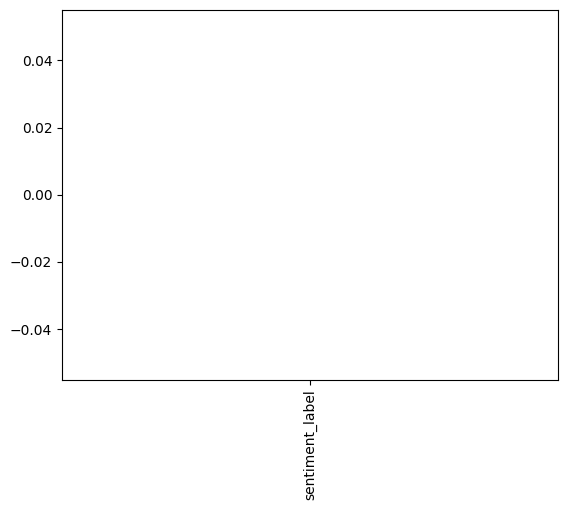

In [76]:
#graphing the results

chi_values = pd.Series(chi_scores[0] , index = x.columns)
chi_values.sort_values(ascending=False , inplace = True)
chi_values.plot.bar()

In [2]:
df_zero[:1]

NameError: ignored

Counting the use of punctuation

In [ ]:

import re

# Assuming your DataFrame is already defined as "df"

# Define the patterns for punctuations
punctuation_pattern = r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

# Count the occurrences of punctuations in the "text" column
df_zero['punctuation_count'] = df_zero['text'].str.count(punctuation_pattern)
df_one['punctuation_count'] = df_one['text'].str.count(punctuation_pattern)

# Display the DataFrame with the counts
print(df[['punctuation_count', 'emoticon_count', 'emoji_count']])


In [1]:
#Counting the use of emojis
#!pip install emoji

# Define a function to count emojis in a text
def count_emojis(text):
    emoji_count = 0
    for character in text:
        if char_is_emoji(character):
            emoji_count += 1
    return emoji_count

# Apply the function to the "text" column to count emojis
df_zero['emoji_count'] = df_zero['text'].apply(count_emojis)
df_one['emoji_count'] = df_one['text'].apply(count_emojis)

# Display the DataFrame with the emoji counts
print(df_zero[['emoji_count']])
print(df_one[['emoji_count']])

NameError: ignored

In [ ]:
#Counting emoticons

emoticons = ["[: )", ":-]", ":-3", ":->", "8-)", ":-}", ":)", ":]", ":3", ":>", "8)", ":}", ":o)", ":c)", ":^)", "=]", "=)", ":-))", ": D", "8 D", "x D", "X D", ":D", "8D", "xD", "XD", "=D", "=3", "B^D", ":-*", ":*", ":×'", "; )", "*-)", "; ]", ";)", "*)", ";]", ";^)", ": ,", ";D", "<3", "(:", ": (", ": c", ": <", ": [", ":(", ":c", ":<", ":[", ":-||", ">:[", ":{", ":@", ">:(", ":' (", ":'(", "D ':", "D:<", "D:", "D8", "D;", "D=", "DX", ": O", ": o", ":O", ":o", ":-0", "8 0", ">:O"]

# Define a function to count the usage of emoticons in a text
def count_emoticons(text):
    emoticon_count = sum(text.count(emoticon) for emoticon in emoticons)
    return emoticon_count

# Apply the function to the "text" column to count emoticons
df_zero['emoticon_count'] = df_zero['text'].apply(count_emoticons)
df_one['emoticon_count'] = df_one['text'].apply(count_emoticons)

# Display the DataFrame with the emoticon counts
print(df_zero[['text', 'emoticon_count']])


Removing stop words, word frequency and tfidf

In [22]:
#The dataset is split into one and zero labelled sets. We will turn each into a list of strings

#convert the text column into list of strings

zero_strings = dataset_zero['text'].tolist()
one_strings = dataset_one['text'].tolist()


In [ ]:
#creating regex function to remove punctuation
import re
def remove_punctuation(text):
   punctuation_regex = re.compile(r'[^\w\s,]')

   return punctuation_regex.sub('', text)





In [ ]:
#removal of punctuation and tokenization

import nltk
nltk.download('punkt')
from nltk import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
long_string_zero = " ".join(zero_strings)

#using regex on zero to remove punctuations
remove_punctuation(long_string_zero)

#lowercasing everything
long_string_zero = long_string_zero.lower()
tokenized_zero = word_tokenize(long_string_zero)
print(tokenized_zero)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['gr', 'gr', 'dreaming', 'of', 'ex', 'crush', 'to', 'be', 'my', 'game', ',', 'god', 'wkwkwk', 'what', 'a', 'joke', 'leaves', 'are', 'also', 'standby', 'in', 'front', 'of', 'the', 'pc', '...', 'because', 'the', 'office', 'is', 'no', 'longer', 'on', 'leave', 'thank', 'god', 'even', 'though', 'it', "'s", 'just', 'a', 'ride', 'through', 'wedding', 'teaser', 'concept', 'using', 'the', 'song', 'day6', '-', 'only', ',', 'sounds', 'good', 'ga', 'siiih', 'no', 'comeback~', 'sender', 'my', 'sc', 'on', 'weirdðÿ˜', '«', '1.7', 'fucking', 'years', 'bismillah', 'for', 'eid', '2021', ',', 'you', 'get', 'a', 'few', 'questions', ',', 'you', 'get', 'a', 'lot', 'of', 'thr', 'why', 'is', 'the', 'call', 'to', 'prayer', 'taking', 'so', 'long', '?', 'what', 'should', 'i', 'do', ':', '-', '(', 'i', 'want', 'to', 'spend', 'a', 'lot', 'of', 'time', 'shopping', 'for', 'snacks', 'for', 'eid', 'but', 'i', 'have', '2', 'million', 'left', ',', 'make', 'a', 'self-registration', 'i', 'like', 'to', 'be', 'grateful', ',

In [ ]:
zero_tokens_final[:15]

['gr',
 ' ',
 'gr',
 ' ',
 'dreaming',
 ' ',
 'ex',
 ' ',
 'crush',
 ' ',
 'game',
 ' ',
 ',',
 ' ',
 'god']

Stop words

In [ ]:
#removal of stop words for zero and the final list of tonkens

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

zero_tokens_final = []
for i in tokenized_zero:
  if i not in stopwords:
    zero_tokens_final.append(i)
    zero_tokens_final.append(' ')

''.join(zero_tokens_final)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"gr gr dreaming ex crush game , god wkwkwk joke leaves also standby front pc ... office longer leave thank god even though 's ride wedding teaser concept using song day6 - , sounds good ga siiih comeback~ sender sc weirdðÿ˜ « 1.7 fucking years bismillah eid 2021 , get questions , get lot thr call prayer taking long ? : - ( want spend lot time shopping snacks eid 2 million left , make self-registration like grateful , n't think , stay away guy , long 's updated 's got new girl wkwk maybe feels handsome feel really bad hah move fast , 's good thing 'm < 3 annoyed , hurry bruh ! really said rip really want see btob mix blowin bull 's eye perform feeling happy today feel like slapping mama touched thank jesus chat . sister seems tired hearing play sunlit smile motorcycle haha hope brother 's strength n't go children luckily album poster u doin ? yeah babe morning smell really good : ' person blg parcel hampers blah blah blah . given , want ? room cleaning u doin buddy ? nct dream hot sauce

In [ ]:
#removal of punctuation and tokenization for one
import nltk
nltk.download('punkt')
from nltk import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
long_string_one = " ".join(zero_strings)
#using regex on zero to remove punctuations
remove_punctuation(long_string_one)
#lowercasing everything
long_string_one = long_string_one.lower()
tokenized_one = word_tokenize(long_string_one)
print(tokenized_one)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['gr', 'gr', 'dreaming', 'of', 'ex', 'crush', 'to', 'be', 'my', 'game', ',', 'god', 'wkwkwk', 'what', 'a', 'joke', 'leaves', 'are', 'also', 'standby', 'in', 'front', 'of', 'the', 'pc', '...', 'because', 'the', 'office', 'is', 'no', 'longer', 'on', 'leave', 'thank', 'god', 'even', 'though', 'it', "'s", 'just', 'a', 'ride', 'through', 'wedding', 'teaser', 'concept', 'using', 'the', 'song', 'day6', '-', 'only', ',', 'sounds', 'good', 'ga', 'siiih', 'no', 'comeback~', 'sender', 'my', 'sc', 'on', 'weirdðÿ˜', '«', '1.7', 'fucking', 'years', 'bismillah', 'for', 'eid', '2021', ',', 'you', 'get', 'a', 'few', 'questions', ',', 'you', 'get', 'a', 'lot', 'of', 'thr', 'why', 'is', 'the', 'call', 'to', 'prayer', 'taking', 'so', 'long', '?', 'what', 'should', 'i', 'do', ':', '-', '(', 'i', 'want', 'to', 'spend', 'a', 'lot', 'of', 'time', 'shopping', 'for', 'snacks', 'for', 'eid', 'but', 'i', 'have', '2', 'million', 'left', ',', 'make', 'a', 'self-registration', 'i', 'like', 'to', 'be', 'grateful', ',

In [ ]:
#removal of stop words for one

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
one_tokens_final = []
for i in tokenized_zero:
  if i not in stopwords:
    one_tokens_final.append(i)
    one_tokens_final.append(' ')

''.join(one_tokens_final)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"gr gr dreaming ex crush game , god wkwkwk joke leaves also standby front pc ... office longer leave thank god even though 's ride wedding teaser concept using song day6 - , sounds good ga siiih comeback~ sender sc weirdðÿ˜ « 1.7 fucking years bismillah eid 2021 , get questions , get lot thr call prayer taking long ? : - ( want spend lot time shopping snacks eid 2 million left , make self-registration like grateful , n't think , stay away guy , long 's updated 's got new girl wkwk maybe feels handsome feel really bad hah move fast , 's good thing 'm < 3 annoyed , hurry bruh ! really said rip really want see btob mix blowin bull 's eye perform feeling happy today feel like slapping mama touched thank jesus chat . sister seems tired hearing play sunlit smile motorcycle haha hope brother 's strength n't go children luckily album poster u doin ? yeah babe morning smell really good : ' person blg parcel hampers blah blah blah . given , want ? room cleaning u doin buddy ? nct dream hot sauce

In [ ]:
one_tokens_final[:8]

['gr', ' ', 'gr', ' ', 'dreaming', ' ', 'ex', ' ']

In [ ]:
#lemmatization of tokens
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

#lemmatization of one tokens
lem_zero = []
for token in one_tokens_final:
  lemmatized_token = lemmatizer.lemmatize(token)
  lem_zero.append(lemmatized_token)


#lemmatization of one tokens
lem_one = []
for tokens in one_tokens_final:
  lemmatized_token = lemmatizer.lemmatize(token)
  lem_one.append(lemmatized_token)

[nltk_data] Downloading package wordnet to /root/nltk_data...


NameError: ignored

In [ ]:
lem_one[500:515]

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [ ]:
#word frequency for zero
d_zero={}
for i in lem_zero:
  d_zero[i] = lem_zero.count(i)


In [ ]:
#word frequency
from collections import Counter

##word frequency for zero
Counter(zero_tokens_final)


Counter({'gr': 2,
         ' ': 59390,
         'dreaming': 13,
         'ex': 6,
         'crush': 7,
         'game': 6,
         ',': 4395,
         'god': 122,
         'wkwkwk': 22,
         'joke': 4,
         'leaves': 6,
         'also': 78,
         'standby': 2,
         'front': 12,
         'pc': 26,
         '...': 246,
         'office': 20,
         'longer': 12,
         'leave': 38,
         'thank': 73,
         'even': 209,
         'though': 94,
         "'s": 1428,
         'ride': 14,
         'wedding': 2,
         'teaser': 13,
         'concept': 9,
         'using': 25,
         'song': 31,
         'day6': 2,
         '-': 92,
         'sounds': 1,
         'good': 199,
         'ga': 13,
         'siiih': 1,
         'comeback~': 1,
         'sender': 1,
         'sc': 2,
         'weirdðÿ˜': 2,
         '«': 44,
         '1.7': 6,
         'fucking': 1,
         'years': 32,
         'bismillah': 29,
         'eid': 130,
         '2021': 5,
         'get': 

In [ ]:
# First, create our frequency distribution dictionary
from nltk import FreqDist
fdist = FreqDist(lem_zero) # This creates a list of frequencies for words
fdistkeys = list(fdist.keys()) # The keys are the words/tokens
fdistkeys[:20] # Look at the first 20 keys/words

['gr',
 ' ',
 'dreaming',
 'ex',
 'crush',
 'game',
 ',',
 'god',
 'wkwkwk',
 'joke',
 'leaf',
 'also',
 'standby',
 'front',
 'pc',
 '...',
 'office',
 'longer',
 'leave',
 'thank']

In [ ]:
# First, create our frequency distribution dictionary
from nltk import FreqDist
fdist_one = FreqDist(lem_one) # This creates a list of frequencies for words
fdistkeys_one = list(fdist.keys()) # The keys are the words/tokens
fdistkeys_one[:20] # Look at the first 20 keys/words

['gr',
 ' ',
 'dreaming',
 'ex',
 'crush',
 'game',
 ',',
 'god',
 'wkwkwk',
 'joke',
 'leaf',
 'also',
 'standby',
 'front',
 'pc',
 '...',
 'office',
 'longer',
 'leave',
 'thank']

In [ ]:
#social media has a lot of inconvinient words
# The most_common() method will give us a list of the key-value pairs with
# the highest frequencies.
topkeys = fdist.most_common(10)

# In this for loop, "pair" refers to the word together with its frequency value
for pair in topkeys:
    print (pair)

(' ', 59390)
(',', 4395)
('.', 2031)
("'s", 1428)
('?', 1328)
("n't", 1009)
('!', 672)
('want', 624)
("'m", 592)
('..', 521)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Creating sparse DTM
DTM = vectorizer.fit_transform(dataset['text'])

# Storing the DTM in pandas dataframe
DTM = pd.DataFrame(DTM.toarray())

# Setting the column/feature names as document terms
DTM.columns = vectorizer.get_feature_names_out()

DTM

NameError: ignored

In [ ]:
# Creating countvectorizer object
# Supports preprocessing (lowercasing, removing stopwords, stemming) on raw data
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words=all_stopwords)

# Check for np.nan values and remove them
#dataset["text"].replace(to_replace=np.nan, value="", inplace=True)
dataset["text"].fillna("", inplace=True)

type(vectorizer)

sklearn.feature_extraction.text.CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Creating sparse DTM
DTM = vectorizer.fit_transform(dataset['text'])

# Storing the DTM in pandas dataframe
DTM = pd.DataFrame(DTM.toarray())

# Setting the column/feature names as document terms
DTM.columns = vectorizer.get_feature_names_out()

DTM

NameError: ignored

In [ ]:
vocabulary_ = list(vectorizer.vocabulary_.keys())
len(vocabulary_)

11375

In [ ]:
vocabulary_[:15]

['oh',
 'gosh',
 'trouble',
 'sleeping',
 'confused',
 'mind',
 'restless',
 'heart',
 'tune',
 'wrong',
 'dear',
 'forward',
 'doubt',
 'stay',
 'place']

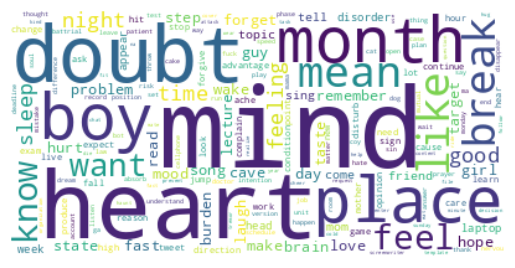

In [ ]:
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Appending all the words in the vocabulary to match the input format of the wordcloud module
vocabulary = ' '.join(vocabulary_).lower()

# Create the wordcloud object
wordcloud = WordCloud(stopwords = all_stopwords,
                      collocations=True,
                      background_color='white'
                      ).generate(vocabulary)

# Plot the wordcloud object using matplotlib
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
# Creating TF-IDF vectorizer object
# Supports preprocessing (lowercasing, removing stopwords, stemming) on raw data
tfidf_vect = TfidfVectorizer(lowercase=True, stop_words=all_stopwords)

In [ ]:
# Creating sparse DTM
TFIDF = tfidf_vect.fit_transform(dataset['text'])

# Storing the DTM in pandas dataframe
TFIDF = pd.DataFrame(TFIDF.toarray())

# Setting the column/feature names as document terms
TFIDF.columns = tfidf_vect.get_feature_names_out()

TFIDF

,00,000,0000,0071,00wib,01,010x5934x4115í,010x8871x5266í,018e,02,...,žâœ,žã,žð,žðÿ,ƒspotify,ƒðÿ,ˆã,ˆì,ˆíš,ˆðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get frequency of all the words from the original DTM
freqList = DTM.sum(axis=0)
type(freqList)

# Get data of all the words from the new TF-IDF DTM
tfidfList = TFIDF.sum(axis=0)
type(tfidfList)

# Now let's glue them together and have a look
compare_DF = pd.concat([freqList, tfidfList], axis=1)
compare_DF.columns = ["Frequency", "TF-IDF"]
compare_DF
# Use the magic wand tool to get an interactive version of the DF
# Then try sorting first by Frequency, then by TF-IDF. Look for
# differences in where the most important items appear.


,Frequency,TF-IDF
00,22,7.139642
000,11,3.054888
0000,6,2.130598
0071,1,0.274061
00wib,1,0.388806
...,...,...
ƒðÿ,14,3.756078
ˆã,3,0.818846
ˆì,16,1.707174
ˆíš,1,0.528921


New trial

In [ ]:
# First, create our frequency distribution dictionary
from nltk import FreqDist
fdist = FreqDist(lem_one) # This creates a list of frequencies for words

# Note that the list of bound methods for fdist includes "keys()." In Python
# a dictionary has "key-value" pairs. Python uses highly efficient
# methods to help you find a "key" and return the associated "value."
fdistkeys = list(fdist.keys()) # The keys are the words/tokens
fdistkeys[:20] # Look at the first 20 keys/words

[' ']

In [ ]:

# Create a dictionary to store the token frequencies
token_frequencies = {}


# Iterate through the list of tokens and increment the frequency of each token
for token in lem_one:
  token_frequencies[token] += 1

# Create a pandas dataframe from the dictionary
df = pd.DataFrame.from_dict(token_frequencies, orient="index", columns=["Frequency"])

# Display the dataframe
print(df.to_string())


KeyError: ignored